In [33]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import xarray as xr
from xclim.indices.generic import select_resample_op
from xclim.indices.stats import fit, parametric_quantile
import numpy as np
from scipy.stats import genextreme as gev

In [3]:
ds = xr.open_dataset('/g/data/xv83/bxn599/CaRSA/agcd_v1_concatenated/agcd_v1_tmax_mean_r005_daily_1980-2019.nc')

In [9]:
ds['tmax'].attrs = {
    'standard_name': 'air_temperature',
    'long_name': 'Daily Maximum Near-Surface Air Temperature',
    'units': 'degC',
}

In [10]:
ds

<xarray.Dataset>
Dimensions:    (time: 14610, bnds: 2, lon: 886, lat: 691)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01T09:00:00 ... 2019-12-31T09:00:00
  * lon        (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2
  * lat        (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1980-01-01T09:00:00 ... 2020-01-01...
    lon_bnds   (lon, bnds) float32 112.0 112.0 112.0 112.1 ... 156.2 156.2 156.3
    lat_bnds   (lat, bnds) float32 -44.53 -44.47 -44.48 ... -10.03 -10.02 -9.975
    crs        int32 1
    tmax       (time, lat, lon) float32 ...
Attributes: (12/35)
    CDI:                       Climate Data Interface version 1.9.8 (https://...
    history:                   Mon Oct 04 06:03:36 2021: cdo cat agcd_v1_tmax...
    source:                    Data is from site-based observation data recor...
    institution:               Australian Bureau of Meteorology, GPO Box 1289...
    Conventions:               CF-1.6, ACDD-1.3
    geospatial_lat_min:        -44.525
    ...                        ...
    licence:                   Data Licence: The grid data files in this AGCD...
    description:               This AGCD data is a snapshot of the operationa...
    date_issued:               2020-12-02 09:15:40
    attribution:               Data should be cited as : Australian Bureau of...
    copyright:                 (C) Copyright Commonwealth of Australia 2020, ...
    CDO:                       Climate Data Operators version 1.9.8 (https://...

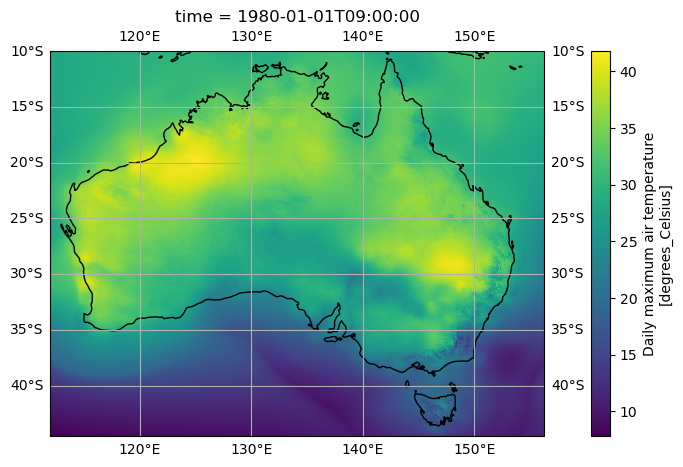

In [8]:
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ds['tmax'].isel({'time': 0}).plot(
    ax=ax,
#    levels=levels,
#    extend=extend,
    transform=ccrs.PlateCarree(),
#    cmap=cmap,
    )
ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
#    linewidth=2,
#    color='gray',
#    alpha=0.5,
#    linestyle='--'
)
ax.coastlines()
plt.show()

In [65]:
def eva_analysis(lat, lon, pdf_xvals):
    """Peform EVA analysis for a particular grid point."""
    
    da = ds['tmax'].sel({'lat': lat, 'lon': lon}, method='nearest').compute()
    da.plot()
    plt.show()
    
    block_values = select_resample_op(da, op='max', freq='Y')
    block_values.plot()
    plt.show()
    
    params = fit(block_values, dist='genextreme', method='PWM')
    
    ev = parametric_quantile(params, q=0.95)
    print(ev.values)
    
    block_values_ds = block_values.to_pandas()
    gev_shape, gev_loc, gev_scale = params.values
    
    fig, ax = plt.subplots(figsize=[6, 4]) 
    block_values_ds.plot.hist(bins=20, density=True, color='tab:green', alpha=0.5)
    gev_pdf = gev.pdf(pdf_xvals, gev_shape, gev_loc, gev_scale)
    plt.plot(pdf_xvals, gev_pdf, color='tab:green', linewidth=4.0)
    plt.xlabel('tmax (C)')
    plt.ylabel('probability')
    plt.title(f'TXx (latitude: {lat}, longitude: {lon})')
    plt.show()

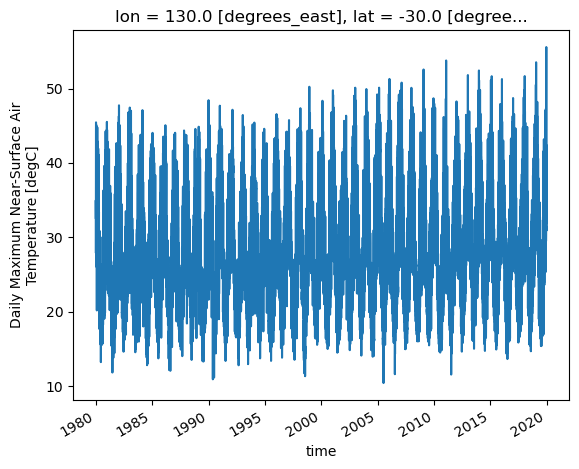

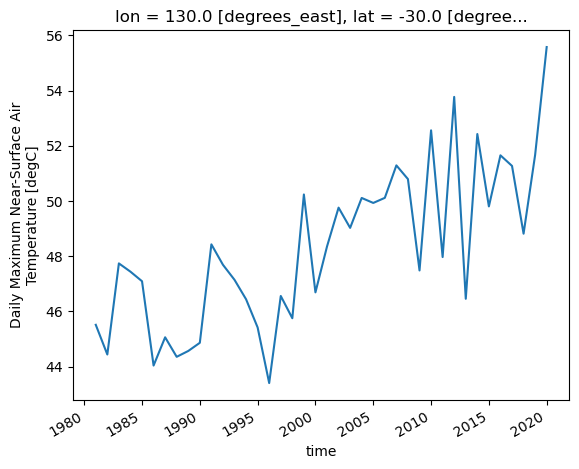

[53.61705747]


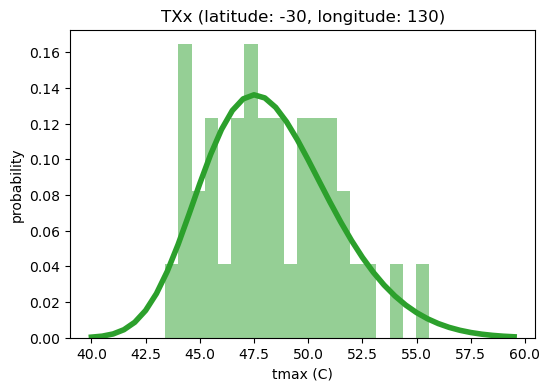

In [66]:
eva_analysis(-30, 130, np.arange(40, 60, 0.5))

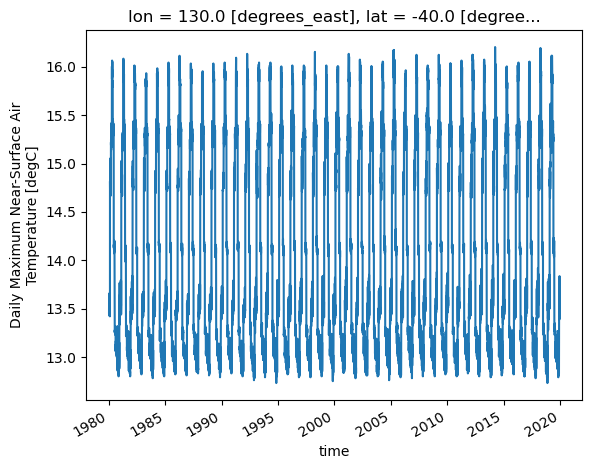

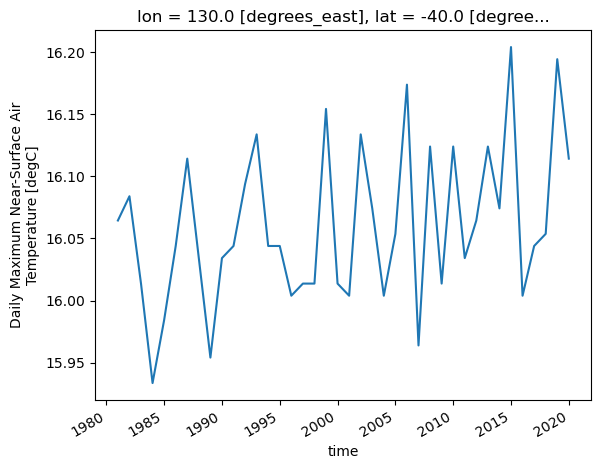

[16.1789391]


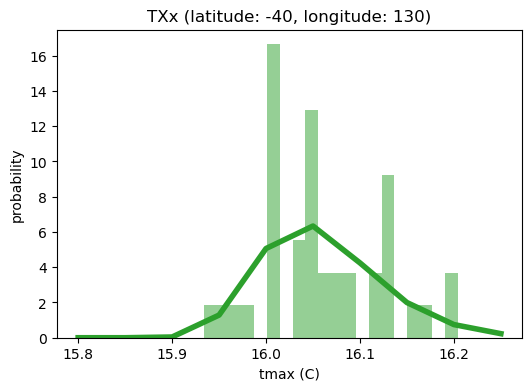

In [69]:
eva_analysis(-40, 130, np.arange(15.8, 16.3, 0.05))